# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


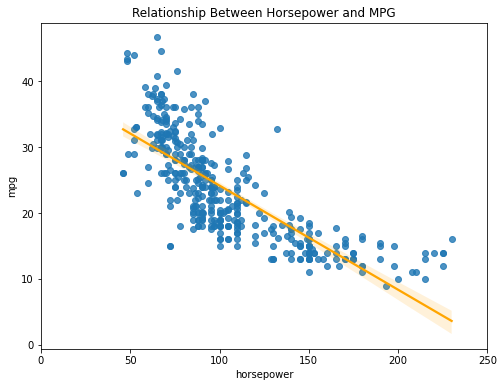

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
call_on_students(1)

['Gideon']


#### Answer: 

- graph of loss functions
- determined by the difference between the slope and the actual points
- used to help describe gradient descent


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
call_on_students(1)

['Mahum']


- like a ping pong ball, it estimates bouncing back and forth between
points along the slope's axis to find the tangent of the intersection
of the curve until it reaches the point that has a tangent angle of 0
or until it reaches the maximum number of iterations

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
call_on_students(1)

['Vlad']


#### Answer: 

- step size is the standard distance that the calculation moves
along the x axis in an attempt to find the lowest y value

- determined by the proportion of the gradient
    - higher learning rate = bigger steps and vice versa

## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
call_on_students(1)

['JD']


#### Answer: 

- used for categorical
- gets probability of the classes, via log-odds and logit/sigmoid

- linear regression is used to describe continuous variables
- parametric model, uses linear equation so it has betas 
(coefficients, weights)
- $ y = b0 + x1 \cdot b1 + x2 \cdot b2 + x3 \cdot b3 + ...$


Bonus: when would we consider a non-parametric model over logistic regression?

- features are not linear with target
- high dimensionality data, sparse data (lots of 0s and 1s)

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
call_on_students(1)

['Stephanie']


#### Answer: 

- decision tree
    - more granular, predict_proba - shows probability
    - can directly interpret coefficients
    - less prone to overfitting, regularizes by default

- won't work on high dimensionality as before



## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
call_on_students(1)

['Luke']


In [59]:
#train_test_split?

In [16]:
# Train-test split
# Set test_size=0.33 and random_state=42

X = mpg_class.drop(columns=['target'])
y = mpg_class['target']

X_train, X_test, y_train, y_test = train_test_split(
                    X,y,
                    test_size=0.33,
                    random_state=42
)

display(X_train.head(2), X_test.head(2), y_train.head(2), y_test.head(2))

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
363,4,112.0,88,2640,18.6,82,1
180,4,107.0,86,2464,15.5,76,2


,cylinders,displacement,horsepower,weight,acceleration,model year,origin
78,4,96.0,69,2189,18.0,72,2
274,4,121.0,115,2795,15.7,78,2


363    0
180    0
Name: target, dtype: int64

78     0
274    0
Name: target, dtype: int64

In [18]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [23]:
# Code to explore
(tmp := mpg_class['target']).value_counts() , tmp.value_counts(normalize=True)

(0    293
 1     99
 Name: target, dtype: int64,
 0    0.747449
 1    0.252551
 Name: target, dtype: float64)

#### Answer:

- 3/4 of the entries are 0, very imbalanced


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- a dummy model would assume that all new or missing values are 0s
    - this model would have a ~75% accuracy


#### Part 3: How accurate would that baseline be on test data?


In [25]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- exp above


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [19]:
# call_on_students(1)

#### Answer:

- strictly not a good model, it isn't even a model.
Accuracy isn't everything. Can be very misleading when there is a
class imbalance.
- could use SMOTE to fill the missing data in artificially based on
data that exists in the dataset
- could undersample the majority instead of oversampling the minority
    - mostly only useful when there is a T O N of data
- could use class weights hyper-parameters (e.g. balance)

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [26]:
call_on_students(1)

['Max']


In [31]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [28]:
# plot_confusion_matrix?

Signature:
plot_confusion_matrix(
    estimator,
    X,
    y_true,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
    display_labels=None,
    include_values=True,
    xticks_rotation='horizontal',
    values_format=None,
    cmap='viridis',
    ax=None,
)
Docstring:
Plot Confusion Matrix.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
estimator : estimator instance
    Fitted classifier or a fitted :class:`~sklearn.pipeline.Pipeline`
    in which the last estimator is a classifier.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values.

y : array-like of shape (n_samples,)
    Target values.

labels : array-like of shape (n_classes,), default=None
    List of labels to index the matrix. This may be used to reorder or
    select a subset of labels. If `None` is given, those that appear at
    least once in `y_true` or `y_pred` are used in sorted order.

sample_weight : array-like of shape (n_samples,), d

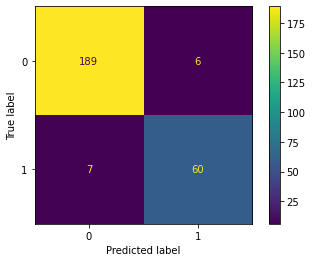

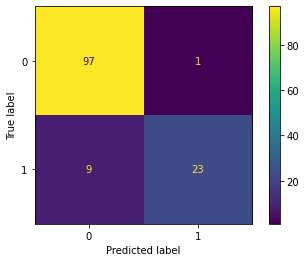

In [34]:
# Plot a confusion matrix on the test data

plot_confusion_matrix(logreg, X_train_scaled, y_train)

plot_confusion_matrix(logreg, X_test_scaled, y_test)
'';

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [23]:
# call_on_students(1)

In [35]:
y_pred_test = logreg.predict(X_test_scaled)

In [36]:
# Accuracy
accuracy_score(y_test,y_pred_test)

0.9230769230769231

In [37]:
# Precision
precision_score(y_test,y_pred_test)

0.9583333333333334

In [38]:
# Recall
recall_score(y_test,y_pred_test)

0.71875

In [39]:
# F1-Score
f1_score(y_test,y_pred_test)

0.8214285714285714

f1 is the _harmonic mean_ of the precision and recall scores

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [28]:
# call_on_students(1)

In [42]:
# Calculate roc-auc
y_pred_test_probs = logreg.predict_proba(X_test_scaled)[:,1]
roc_auc_score(y_test,y_pred_test_probs)

0.9811862244897959

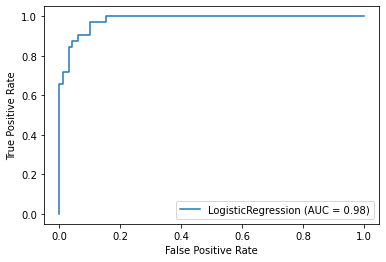

In [43]:
# Plot the ROC curve
plot_roc_curve(logreg,X_test_scaled,y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [31]:
# call_on_students(1)

#### Answer:

- seems like a pretty good model, lowest score is recall which is
still over 71%
- more false negatives than false positives, skewed more toward
predicting negatives
- testing score is lower than training (by a bit) and is overfit


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [44]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

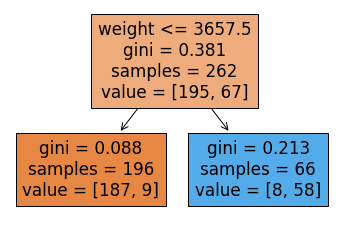

In [46]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

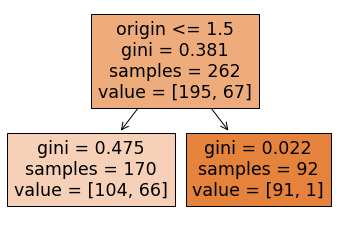

In [45]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- A is the better split option, it has two mostly prue nodes whereas
B has one mixed note and one more pure node


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [47]:
call_on_students(1)

['Shu']


In [50]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

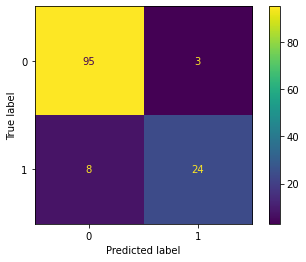

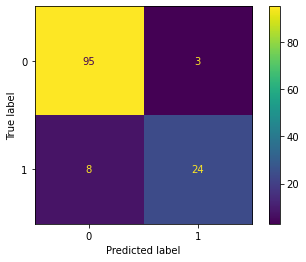

In [56]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt,X_test_scaled,y_test)
dt_s = DecisionTreeClassifier(random_state=42)
dt_s.fit(X_train,y_train)
plot_confusion_matrix(dt_s,X_test,y_test)

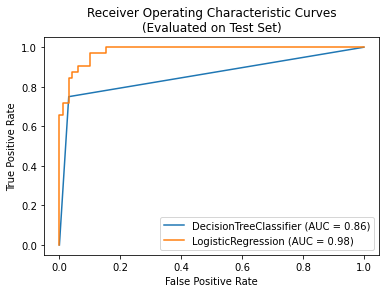

In [57]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [58]:
call_on_students(1)

['Clara']


#### Answer:

- log reg has the better auc at 0.98 over 0.86 with DT
